In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zepto-inventory-dataset/zepto_v2.csv
/kaggle/input/zepto-inventory-dataset/zepto_v1.xlsx


In [2]:
import pandas as pd

# Try reading the CSV with a different encoding
df = pd.read_csv('/kaggle/input/zepto-inventory-dataset/zepto_v2.csv', encoding='latin1')

# Display the first few rows
df.head()


,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


In [3]:
df.shape

(3732, 9)

In [4]:
df.tail(10)

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
3722,Health & Hygiene,"Eno Cooling Sachets - Cool Mint, 6 Pieces Carton",5400,11,0,4800,5,True,5
3723,Health & Hygiene,Whisper Choice Sanitary Pad,3200,9,0,2900,406,True,7
3724,Health & Hygiene,Whisper Bindazzz Nights XL + Sanitary Pad,9000,0,0,9000,406,True,7
3725,Health & Hygiene,Gillette Venus Close & Clean Razor,24900,7,0,23000,58,True,1
3726,Health & Hygiene,Whisper Choice Regular Sanitary Pads,9000,3,0,8700,58,True,20
3727,Health & Hygiene,Stayfree Secure Dry Cover Extra Large Sanitary...,4200,2,0,4100,406,True,7
3728,Health & Hygiene,Dabur Honitus Herbal Cough Remedy Ayurvedic Syrup,10500,15,0,8900,100,True,100
3729,Health & Hygiene,Whisper Bindazzz Night Sanitary Pads XL Plus,18500,0,0,18500,870,True,15
3730,Health & Hygiene,Fine Life Cotton Balls,6000,0,0,6000,50,True,50
3731,Health & Hygiene,Dettol Antiseptic Liquid,3000,0,0,3000,60,True,60


In [5]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Category                  0
name                      0
mrp                       0
discountPercent           0
availableQuantity         0
discountedSellingPrice    0
weightInGms               0
outOfStock                0
quantity                  0
dtype: int64


In [6]:
print("\nData types:\n", df.dtypes)


Data types:
 Category                  object
name                      object
mrp                        int64
discountPercent            int64
availableQuantity          int64
discountedSellingPrice     int64
weightInGms                int64
outOfStock                  bool
quantity                   int64
dtype: object


In [7]:
df['outOfStock'] = df['outOfStock'].astype(int)

In [8]:
df.tail()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
3727,Health & Hygiene,Stayfree Secure Dry Cover Extra Large Sanitary...,4200,2,0,4100,406,1,7
3728,Health & Hygiene,Dabur Honitus Herbal Cough Remedy Ayurvedic Syrup,10500,15,0,8900,100,1,100
3729,Health & Hygiene,Whisper Bindazzz Night Sanitary Pads XL Plus,18500,0,0,18500,870,1,15
3730,Health & Hygiene,Fine Life Cotton Balls,6000,0,0,6000,50,1,50
3731,Health & Hygiene,Dettol Antiseptic Liquid,3000,0,0,3000,60,1,60


In [9]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats


In [10]:
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

In [11]:
num_cols = ['mrp', 'discountPercent', 'availableQuantity', 'discountedSellingPrice', 'weightInGms', 'quantity']

In [12]:
z_scores = np.abs(stats.zscore(df[num_cols]))
outliers = (z_scores > 3)
print(f"\nNumber of outliers per column:\n{outliers.sum(axis=0)}")



Number of outliers per column:
[60 79  0 77 61 37]


In [13]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])


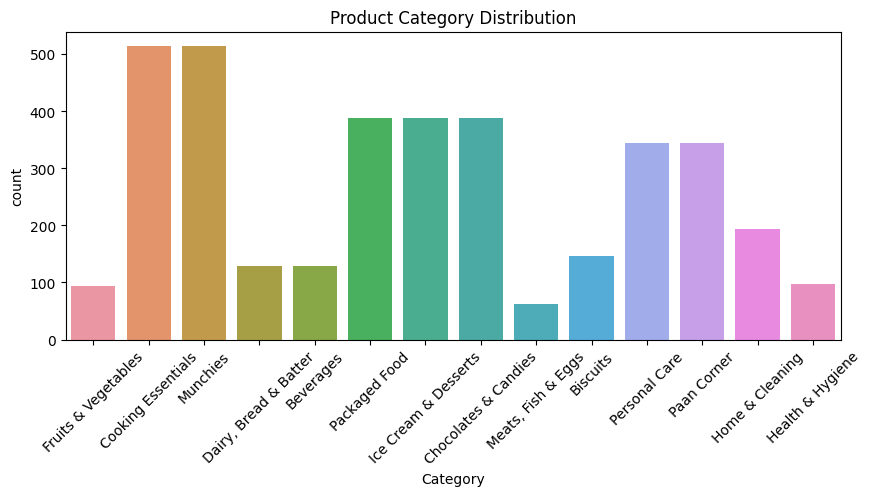

In [14]:
# Category distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=45)
plt.title("Product Category Distribution")
plt.show()

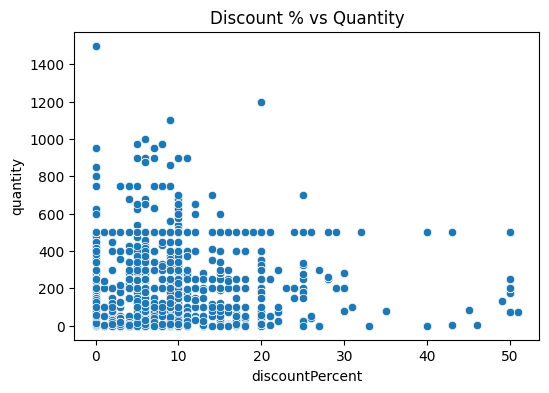

In [15]:
# Discount vs Quantity sold
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='discountPercent', y='quantity')
plt.title("Discount % vs Quantity")
plt.show()

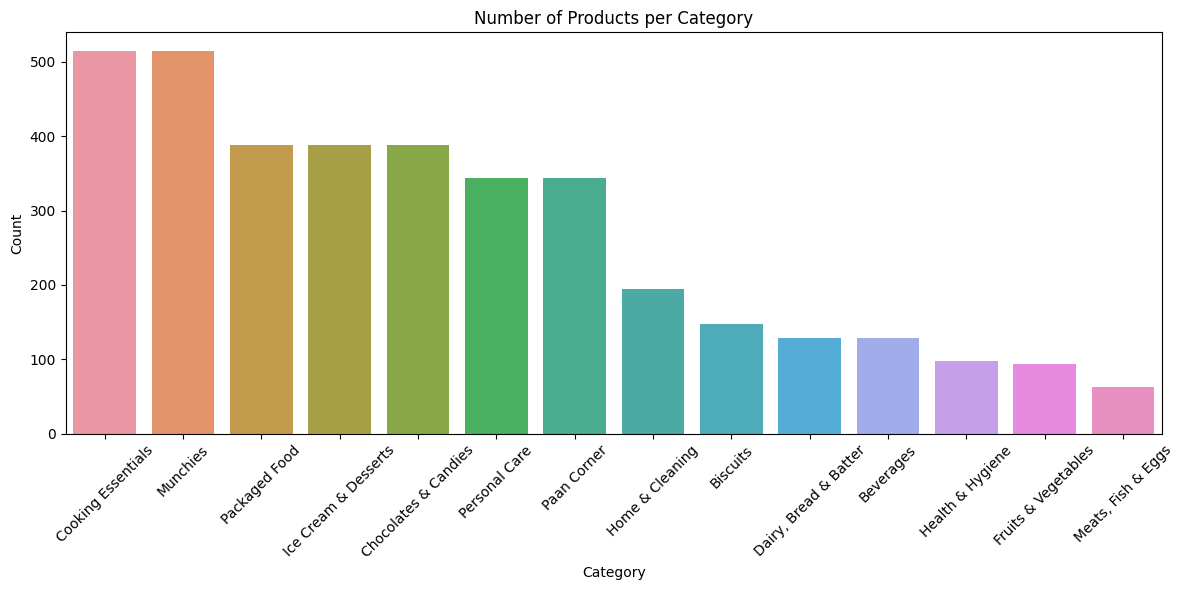

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Products per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


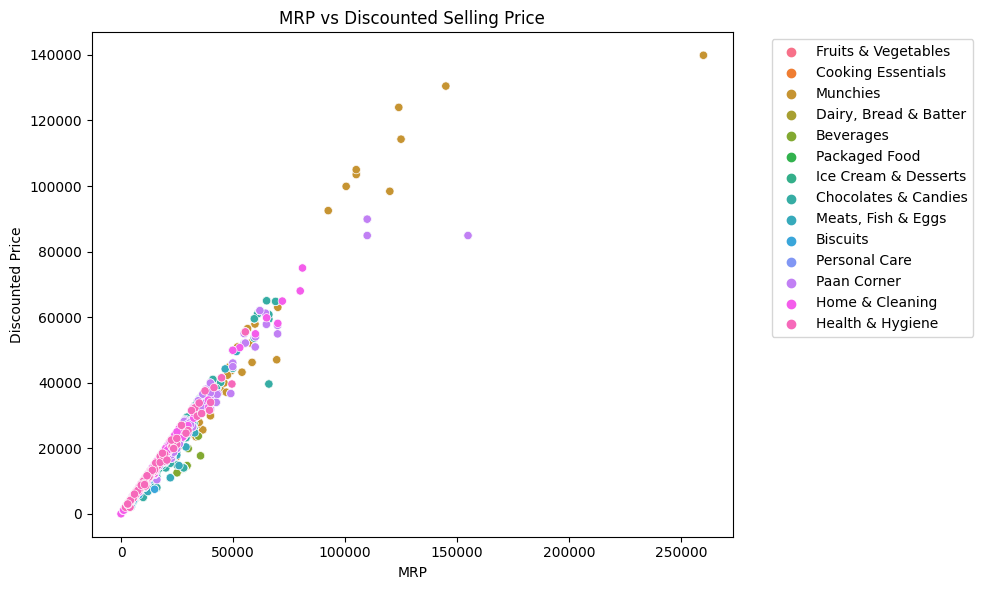

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mrp', y='discountedSellingPrice', hue='Category')
plt.title('MRP vs Discounted Selling Price')
plt.xlabel('MRP')
plt.ylabel('Discounted Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


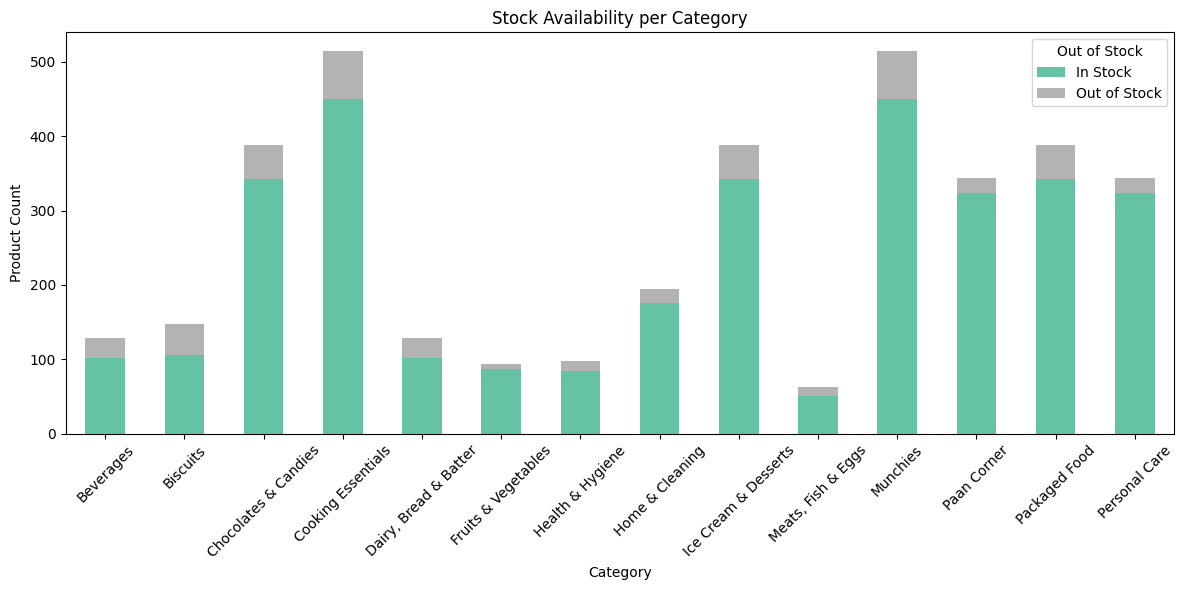

In [43]:
stock_data = df.groupby(['Category', 'outOfStock']).size().unstack(fill_value=0)

stock_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Stock Availability per Category')
plt.xlabel('Category')
plt.ylabel('Product Count')
plt.xticks(rotation=45)
plt.legend(title='Out of Stock', labels=['In Stock', 'Out of Stock'])
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Features and target
features = ['Category_encoded', 'mrp', 'discountPercent', 'availableQuantity', 
            'discountedSellingPrice', 'weightInGms', 'quantity']
X = df_scaled[features]
y = df_scaled['outOfStock']

# Split data into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLP classifier with specified architecture
mlp = MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=200, solver='adam', random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict on test data
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Classifier Accuracy: {accuracy * 100:.2f}%")


MLP Classifier Accuracy: 100.00%


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
features = ['Category_encoded', 'mrp', 'discountPercent', 'availableQuantity', 
            'discountedSellingPrice', 'weightInGms', 'quantity']
X = df[features]
y = df['outOfStock']

# Split first (before scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit scaler only on train set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(30,15,20), max_iter=200, solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict & evaluate
y_pred = mlp.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[656   0]
 [  0  91]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       656
           1       1.00      1.00      1.00        91

    accuracy                           1.00       747
   macro avg       1.00      1.00      1.00       747
weighted avg       1.00      1.00      1.00       747



In [19]:
print(y.value_counts(normalize=True))


outOfStock
0    0.878617
1    0.121383
Name: proportion, dtype: float64


In [20]:
# Check for overlap between train and test
train_idx = X_train.index
test_idx = X_test.index
overlap = train_idx.intersection(test_idx)
print(f"Number of overlapping samples in train and test: {len(overlap)}")


Number of overlapping samples in train and test: 0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Features and target (remove suspicious columns if needed)
features = ['Category_encoded', 'mrp', 'discountPercent', 'weightInGms']  # avoid 'availableQuantity' or 'quantity' if they leak target
X = df[features]
y = df['outOfStock']

# Check class balance
print(y.value_counts(normalize=True))

# Split with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred = rf.predict(X_test_scaled)

# Evaluate with more metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


outOfStock
0    0.878617
1    0.121383
Name: proportion, dtype: float64
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       656
           1       0.50      0.25      0.34        91

    accuracy                           0.88       747
   macro avg       0.70      0.61      0.63       747
weighted avg       0.85      0.88      0.86       747

Confusion Matrix:
 [[633  23]
 [ 68  23]]


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Example feature selection to avoid direct leakage
features = ['Category_encoded', 'mrp', 'discountPercent', 'weightInGms']
target = 'outOfStock'

# Assuming df is your DataFrame and 'Category' is already label encoded as 'Category_encoded'
# If not encoded yet:
if 'Category_encoded' not in df.columns:
    le = LabelEncoder()
    df['Category_encoded'] = le.fit_transform(df['Category'])

X = df[features]
y = df[target]

# Check class distribution
print("Class distribution:\n", y.value_counts(normalize=True))

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define MLP with specified hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=500, random_state=42)

# Train model
mlp.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = mlp.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Class distribution:
 outOfStock
0    0.878617
1    0.121383
Name: proportion, dtype: float64
MLP Accuracy: 87.68%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       656
           1       0.40      0.02      0.04        91

    accuracy                           0.88       747
   macro avg       0.64      0.51      0.49       747
weighted avg       0.82      0.88      0.83       747

Confusion Matrix:
 [[653   3]
 [ 89   2]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data (same as Task 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling (reuse the same scaler from Task 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest with parameters
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train model
rf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Accuracy: 87.82%


In [33]:
model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [34]:
Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_reshaped.shape[1], 1))


<Conv1D name=conv1d_25, built=False>

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load data
df = pd.read_csv('/kaggle/input/zepto-inventory-dataset/zepto_v2.csv', encoding='ISO-8859-1')

# Preprocessing
df.dropna(inplace=True)

# Encode 'Category'
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

# Features and target
features = ['Category_encoded', 'mrp', 'discountPercent', 'weightInGms']
X = df[features].values
y = df['outOfStock'].astype(int).values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for Conv1D: (samples, time steps=features, channels=1)
X_cnn = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_cnn, y, test_size=0.2, random_state=42, stratify=y
)

# CNN model
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    Conv1D(64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=1),
    Conv1D(128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ CNN Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8495 - loss: 0.5135 - val_accuracy: 0.8794 - val_loss: 0.3578
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8792 - loss: 0.3654 - val_accuracy: 0.8794 - val_loss: 0.3469
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8929 - loss: 0.3286 - val_accuracy: 0.8794 - val_loss: 0.3477
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8751 - loss: 0.3456 - val_accuracy: 0.8794 - val_loss: 0.3516
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8873 - loss: 0.3292 - val_accuracy: 0.8794 - val_loss: 0.3442
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8800 - loss: 0.3387 - val_accuracy: 0.8794 - val_loss: 0.3423
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8807 - loss: 0.3356 - val_accuracy: 0.8794 - val_loss: 0.3416
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8769 - loss: 0.3424 - val_accuracy: 0.8794 - val_loss: 0.3424
Ep

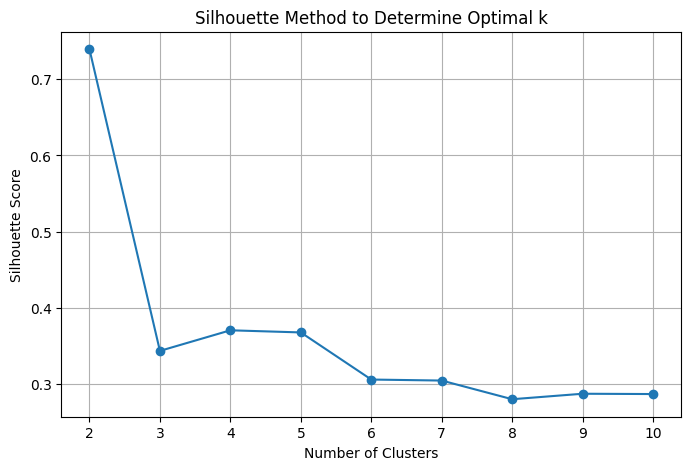


✅ Clustering Accuracy: 87.86%
✅ Silhouette Score: 0.74

Confusion Matrix:
 [[3279    0]
 [ 453    0]]


In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score, confusion_matrix
from scipy.stats import mode
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/zepto-inventory-dataset/zepto_v2.csv', encoding='ISO-8859-1')

# Drop missing values
df.dropna(inplace=True)

# Encode categorical column
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

# Select features
features = ['Category_encoded', 'mrp', 'discountPercent', 'weightInGms']
X = df[features].values
y_true = df['outOfStock'].astype(int).values  # true class labels

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using silhouette score
sil_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method to Determine Optimal k')
plt.grid(True)
plt.show()

# Use best number of clusters (k=2 in this case)
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Map clusters to class labels using majority voting
mapped_labels = np.zeros_like(cluster_labels)
for i in range(best_k):
    mask = (cluster_labels == i)
    mapped_labels[mask] = mode(y_true[mask], keepdims=True).mode[0]

# Evaluation
accuracy = accuracy_score(y_true, mapped_labels)
sil_score = silhouette_score(X_scaled, cluster_labels)
conf_matrix = confusion_matrix(y_true, mapped_labels)

print(f"\n✅ Clustering Accuracy: {accuracy * 100:.2f}%")
print(f"✅ Silhouette Score: {sil_score:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
